**Step 0: Imports and Reading Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\AgriWages_DS_Project\\agri_wages_08_06_2022.csv')

**Step 1: Data Understanding**
- Dataframe shape
- head and tail
- dtypes
- describe

In [5]:
df.shape

(776112, 14)

In [6]:
df.head()

,month,state_name,state_code,district_name,district_code,center_name,center_code,center_lat,center_long,labour_category,labour_type,gender,monthly_average_wage,annual_average_wage
0,01-07-2010,Telangana,36,Adilabad,501,Basar,900988,0.0,0.0,Field Labour,Field Labour,Men,95.0,162.92
1,01-07-2010,Telangana,36,Adilabad,501,Basar,900988,0.0,0.0,Field Labour,Field Labour,Women,80.0,140.00
2,01-07-2010,Telangana,36,Adilabad,501,Basar,900988,0.0,0.0,Herdsmen,Herdsmen,Men,150.0,150.83
3,01-07-2010,Telangana,36,Adilabad,501,Basar,900988,0.0,0.0,Herdsmen,Herdsmen,Women,0.0,0.00
4,01-07-2010,Telangana,36,Adilabad,501,Basar,900988,0.0,0.0,Other Agricultural Labour,Other Agricultural Labour,Men,75.0,137.92


In [7]:
df.columns

Index(['month', 'state_name', 'state_code', 'district_name', 'district_code',
       'center_name', 'center_code', 'center_lat', 'center_long',
       'labour_category', 'labour_type', 'gender', 'monthly_average_wage',
       'annual_average_wage'],
      dtype='object')

In [8]:
df.dtypes

month                    object
state_name               object
state_code                int64
district_name            object
district_code             int64
center_name              object
center_code               int64
center_lat              float64
center_long             float64
labour_category          object
labour_type              object
gender                   object
monthly_average_wage    float64
annual_average_wage     float64
dtype: object

In [9]:
df.describe()

,state_code,district_code,center_code,center_lat,center_long,monthly_average_wage,annual_average_wage
count,776112.000000,776112.000000,776112.000000,776112.000000,776112.000000,776112.000000,776112.000000
mean,18.157988,327.460140,424774.490445,15.268262,52.075070,136.810203,189.690935
std,9.023651,180.126362,367347.179790,11.832842,38.491700,160.766706,153.302597
min,2.000000,15.000000,10013.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,170.000000,134550.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,361.000000,180462.000000,20.775444,76.255690,98.000000,189.500000
75%,23.000000,438.000000,900636.000000,25.117500,81.906210,250.000000,295.830000
max,36.000000,704.000000,901072.000000,32.555370,95.139228,3500.000000,1283.890000


**Step 2: Data Preperation**

- Dropping irrelevant columns and rows
- Removing missing values
- Identifying duplicated columns
- Date Conversion
- Data filtering

In [10]:
#Dropping irrelevant columns and rows
columns_to_drop = ['center_name', 'center_code', 'center_lat', 'center_long', 'state_code']
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
df.isna().sum()

month                   0
state_name              0
district_name           0
district_code           0
labour_category         0
labour_type             0
gender                  0
monthly_average_wage    0
annual_average_wage     0
dtype: int64

In [12]:
#Removing missing values
cols_with_missing = ['labour_category', 'labour_type', 'gender', 'monthly_average_wage', 'annual_average_wage']
df.dropna(subset=cols_with_missing, inplace=True)

In [13]:
#Identifying duplicated columns
df.loc[df.duplicated()]

,month,state_name,district_name,district_code,labour_category,labour_type,gender,monthly_average_wage,annual_average_wage
173,01-07-2010,Andhra Pradesh,Visakhapatanam,520,Herdsmen,Herdsmen,Women,0.0,0.0
177,01-07-2010,Andhra Pradesh,Visakhapatanam,520,Skilled Labour,Blacksmith,Women,0.0,0.0
179,01-07-2010,Andhra Pradesh,Visakhapatanam,520,Skilled Labour,Carpenter,Women,0.0,0.0
181,01-07-2010,Andhra Pradesh,Visakhapatanam,520,Skilled Labour,Cobbler,Women,0.0,0.0
293,01-07-2010,Assam,Jorhat,290,Field Labour,Ploughman,Women,0.0,0.0
...,...,...,...,...,...,...,...,...,...
775745,01-06-2020,Uttarakhand,Uttar Kashi,57,Field Labour,Weeder,Women,0.0,350.0
775746,01-06-2020,Uttarakhand,Uttar Kashi,57,Other Agricultural Labour,Other Agricultural Labour,Men,0.0,400.0
775747,01-06-2020,Uttarakhand,Uttar Kashi,57,Other Agricultural Labour,Other Agricultural Labour,Women,0.0,350.0
775748,01-06-2020,Uttarakhand,Uttar Kashi,57,Skilled Labour,Carpenter,Men,0.0,600.0


In [14]:
# Dropping duplicated columns
df.drop_duplicates(inplace=True)
display(df.shape)

(709268, 9)

In [15]:
# Date Conversion
df['month'] = pd.to_datetime(df['month'], format='%d-%m-%Y', errors='coerce')
df.dropna(subset=['month'], inplace=True)  # Drop rows where date conversion failed
df['year'] = df['month'].dt.year

In [16]:
#Data Filteration
df_filtered = df[(df['monthly_average_wage'] != 0) & (df['annual_average_wage'] != 0)]

**Step 3: Feature Understanding**

(Univariate analysis)

- Plotting Feature Distributions
- Histogram
- KDE

In [17]:
#Counting the labour types
df['labour_type'].value_counts()

labour_type
Other Agricultural Labour    93893
Carpenter                    91989
Reaper & Harvester           82789
Sower                        82528
Weeder                       81824
Ploughman                    75169
Blacksmith                   73596
Herdsmen                     61500
Cobbler                      50629
Field Labour                 15351
Name: count, dtype: int64

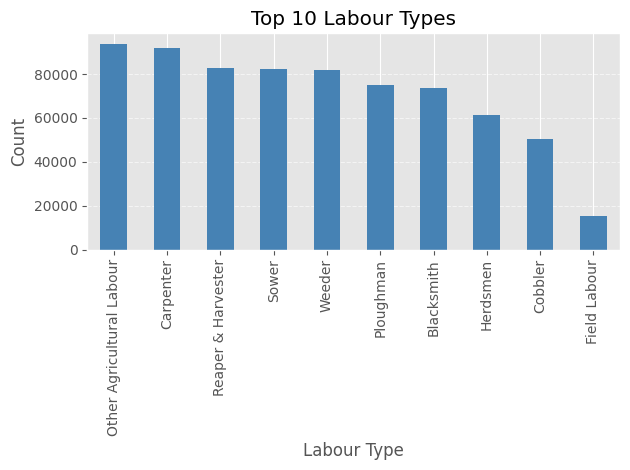

In [18]:
#Top 10 Labour Types
ax = df['labour_type'].value_counts().head(10).plot(kind='bar', title='Top 10 Labour Types', color='steelblue') # Changed color to steelblue
ax.set_xlabel('Labour Type')
ax.set_ylabel('Count')
plt.xticks(rotation=90) # Added rotation to x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

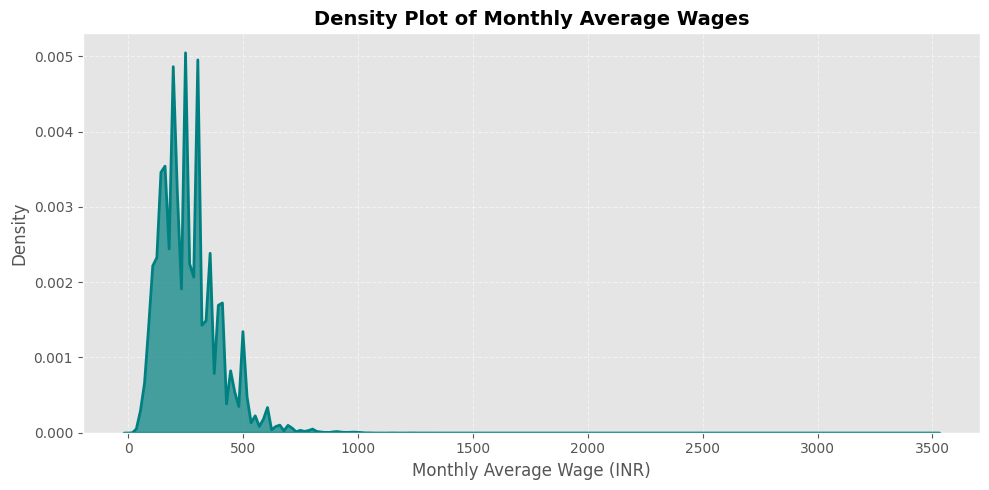

In [19]:
#Density Plot of Monthly Average Wages
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_filtered,x='monthly_average_wage',fill=True,color='teal',linewidth=2,alpha=0.7)
plt.title('Density Plot of Monthly Average Wages', fontsize=14, weight='bold')
plt.xlabel('Monthly Average Wage (INR)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

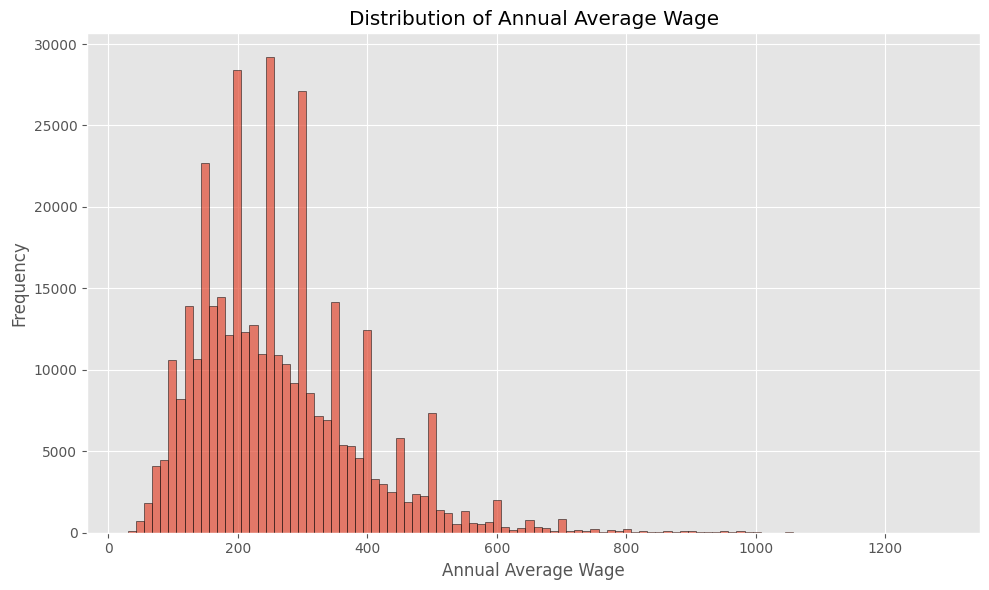

In [20]:
#Distribution of Annual Average Wage
plt.figure(figsize=(10, 6))
ax = df_filtered['annual_average_wage'].plot(kind='hist', bins=100, title='Distribution of Annual Average Wage', edgecolor='black', alpha=0.7)
ax.set_xlabel('Annual Average Wage')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Step 3 b): Feature Understanding**

(Bivariate Analysis)

- Scatter Plot
- Line Plot
- Bar Plot

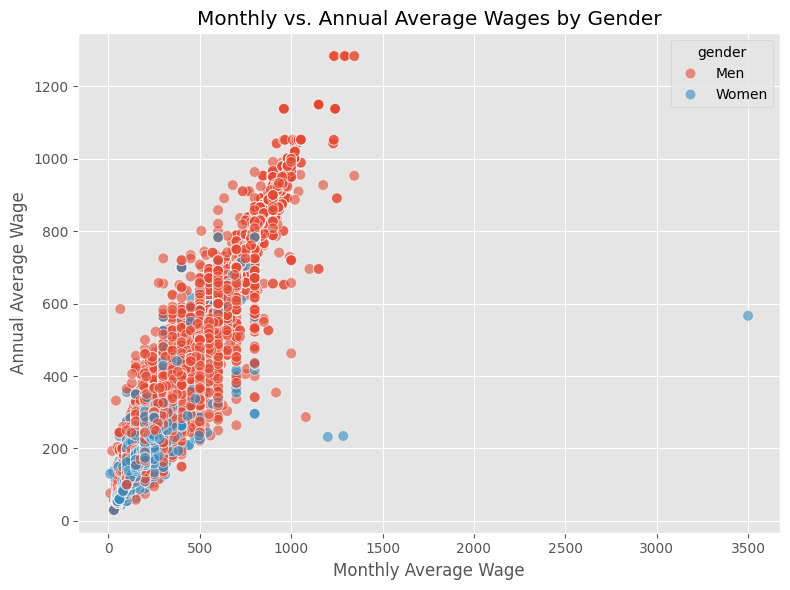

In [21]:
# Monthly vs. Annual Average Wages by Gender
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_filtered, x='monthly_average_wage', y='annual_average_wage', hue='gender', alpha=0.6, edgecolor='w', s=60)
plt.title('Monthly vs. Annual Average Wages by Gender')
plt.xlabel('Monthly Average Wage')
plt.ylabel('Annual Average Wage')
plt.grid(True)
plt.tight_layout()
plt.show()

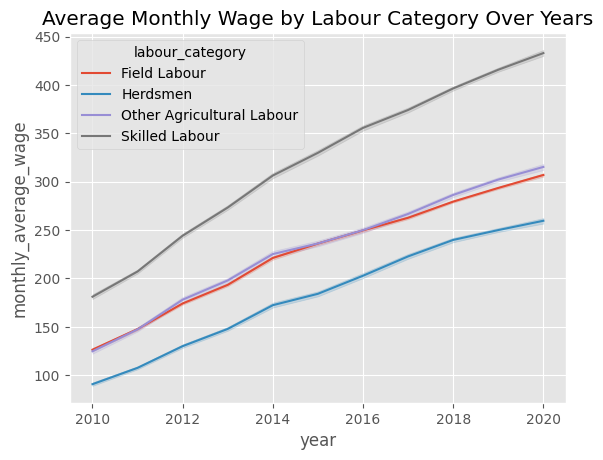

In [22]:
# Time-based Trends
sns.lineplot(data=df_filtered, x='year', y='monthly_average_wage', hue='labour_category', estimator='mean')
plt.title('Average Monthly Wage by Labour Category Over Years')
plt.show()

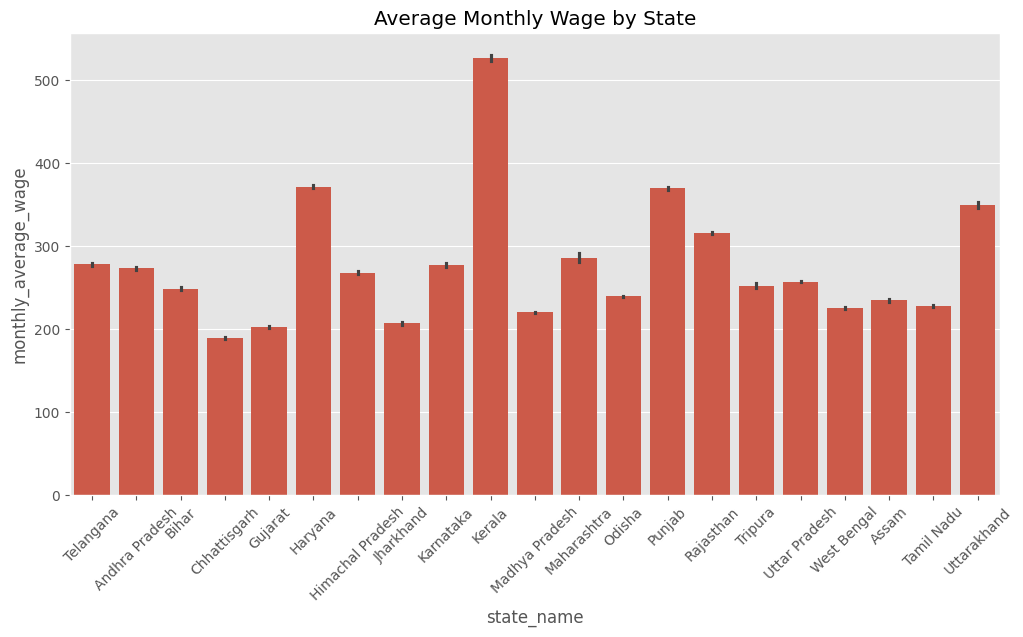

In [23]:
# Average Monthly Wage by State
plt.figure(figsize=(12,6))
sns.barplot(data=df_filtered, x='state_name', y='monthly_average_wage', estimator='mean')
plt.xticks(rotation=45)
plt.title('Average Monthly Wage by State')
plt.show()

**Step 4:  Feature Relationships** (Multivariate Analysis)
- Pairplot
- Correlation Matrix
- Heatmap Correlation
- Grouped Insights

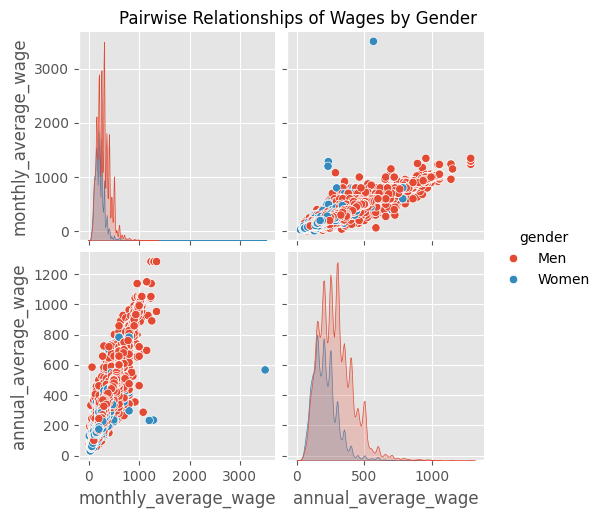

In [24]:
# Pairwise Relationships of Wages by Gender
g = sns.pairplot(df_filtered[['monthly_average_wage', 'annual_average_wage', 'gender']], hue='gender')
g.fig.suptitle('Pairwise Relationships of Wages by Gender', y=1.02)
plt.show()

In [25]:
#Correlation Matrix
correlation_columns = ['monthly_average_wage', 'annual_average_wage', 'district_code', 'year']
corr_matrix = df_filtered[correlation_columns].corr()
corr_matrix

,monthly_average_wage,annual_average_wage,district_code,year
monthly_average_wage,1.000000,0.981127,-0.116679,0.452292
annual_average_wage,0.981127,1.000000,-0.118928,0.455880
district_code,-0.116679,-0.118928,1.000000,0.010313
year,0.452292,0.455880,0.010313,1.000000


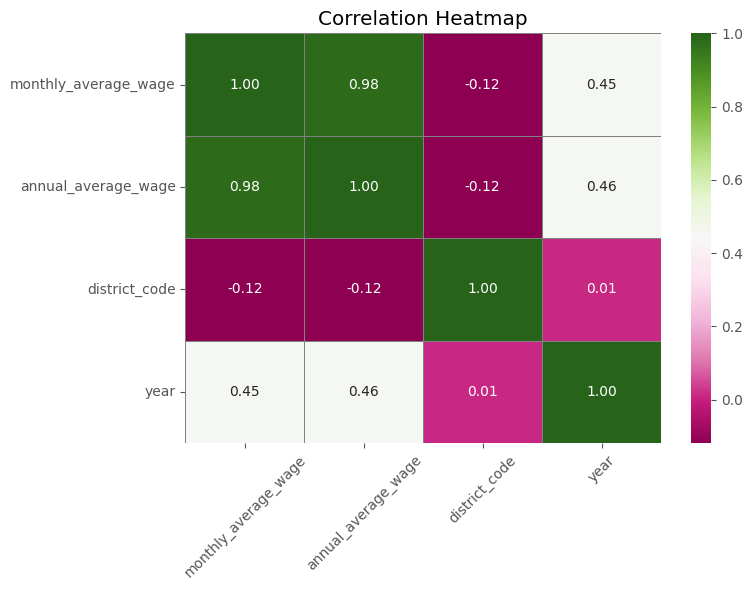

In [26]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Step 5: Comparative Feature Exploration**
- Gender-based comparisons
- State and district disparities
- Outlier detection
- Labour type wage analysis
- Trend visualizations over time

C:\Users\HP\AppData\Local\Temp\ipykernel_13004\210324555.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_filtered,x='year',y='monthly_average_wage',hue='gender',estimator='mean',ci=None,marker='o',palette='Set2')


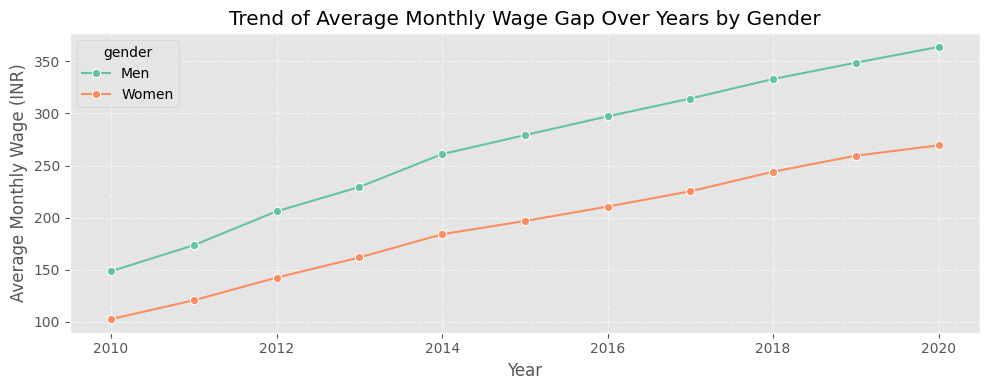

In [27]:
#Trend of Average Monthly Wage Gap Over Years by Gender
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_filtered,x='year',y='monthly_average_wage',hue='gender',estimator='mean',ci=None,marker='o',palette='Set2')
plt.title('Trend of Average Monthly Wage Gap Over Years by Gender')
plt.xlabel('Year')
plt.ylabel('Average Monthly Wage (INR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [28]:
district_avg_monthly = df_filtered.groupby(['district_name', 'district_code'])['monthly_average_wage'].mean().reset_index()

# Top 5 Districts by Monthly Avg Wage
top_districts_monthly = district_avg_monthly.sort_values(by='monthly_average_wage', ascending=False).head(5)
display(top_districts_monthly.style.set_caption("Top 5 Districts by Monthly Average Wage").format({'monthly_average_wage': '{:.2f}'}))

# Bottom 5 Districts by Monthly Avg Wage
bottom_districts_monthly = district_avg_monthly.sort_values(by='monthly_average_wage').head(5)
display(bottom_districts_monthly.style.set_caption("Bottom 5 Districts by Monthly Average Wage").format({'monthly_average_wage': '{:.2f}'}))

,district_name,district_code,monthly_average_wage
285,Kozhikode,561,659.96
313,Malappuram,562,626.97
495,Thiruvananthapuram,565,588.34
278,Kollam,559,572.71
380,Pathanamthitta,564,571.00


,district_name,district_code,monthly_average_wage
529,West Singhbhum,343,107.35
142,Dindori,404,125.77
348,Nagpur,484,126.02
37,Balaghat,392,127.81
72,Bharuch,442,130.81


In [29]:
# Gender wage difference per state
gender_state = df_filtered.groupby(['state_name', 'gender'])['monthly_average_wage'].mean().unstack()
gender_state['gap'] = gender_state['Men'] - gender_state['Women']
gender_state_sorted = gender_state.sort_values('gap', ascending=False)
gender_state_sorted.head(5)

gender,Men,Women,gap
state_name,,,
Kerala,602.222216,417.310604,184.911611
Tamil Nadu,310.587357,140.856175,169.731183
Maharashtra,321.258503,202.477811,118.780693
Uttarakhand,382.353701,280.774299,101.579402
Telangana,305.411137,206.465831,98.945306


C:\Users\HP\AppData\Local\Temp\ipykernel_13004\3634284877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_state_sorted.index, y=gender_state_sorted['gap'], palette='Greens_r')


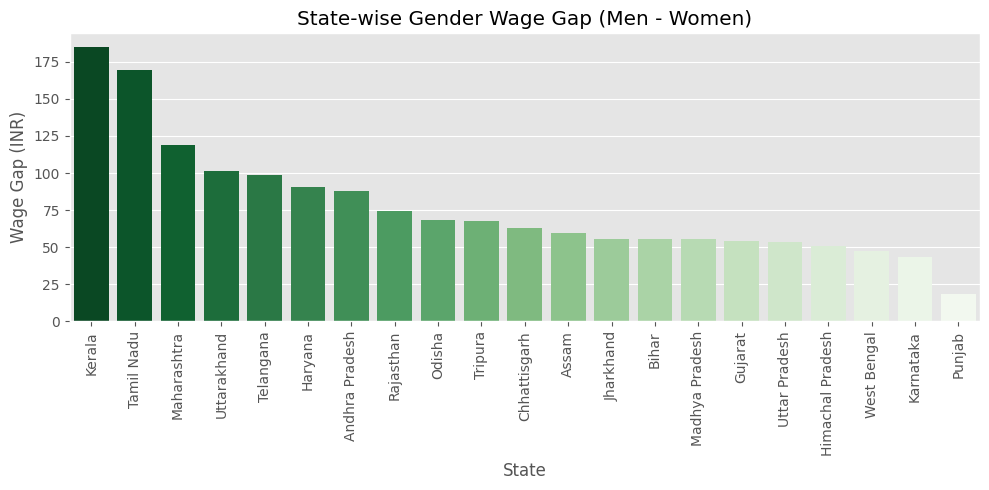

In [30]:
#State-wise Gender Wage Gap (Men - Women)
plt.figure(figsize=(10, 5))
sns.barplot(x=gender_state_sorted.index, y=gender_state_sorted['gap'], palette='Greens_r')
plt.title("State-wise Gender Wage Gap (Men - Women)")
plt.ylabel("Wage Gap (INR)")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


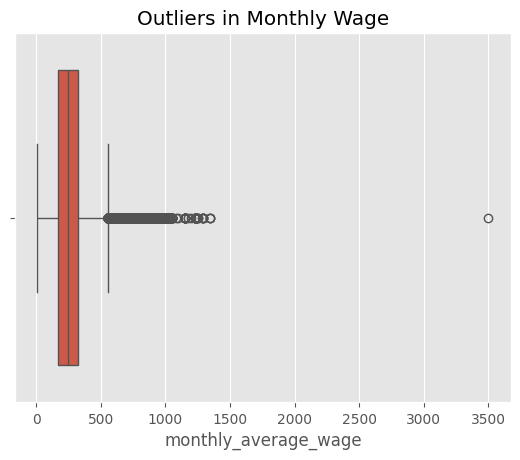

In [31]:
# Outlier Detection
sns.boxplot(data=df_filtered, x='monthly_average_wage')
plt.title('Outliers in Monthly Wage')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13004\3394347550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=labour_type_avg, y='labour_type', x='monthly_average_wage', palette='YlGnBu')


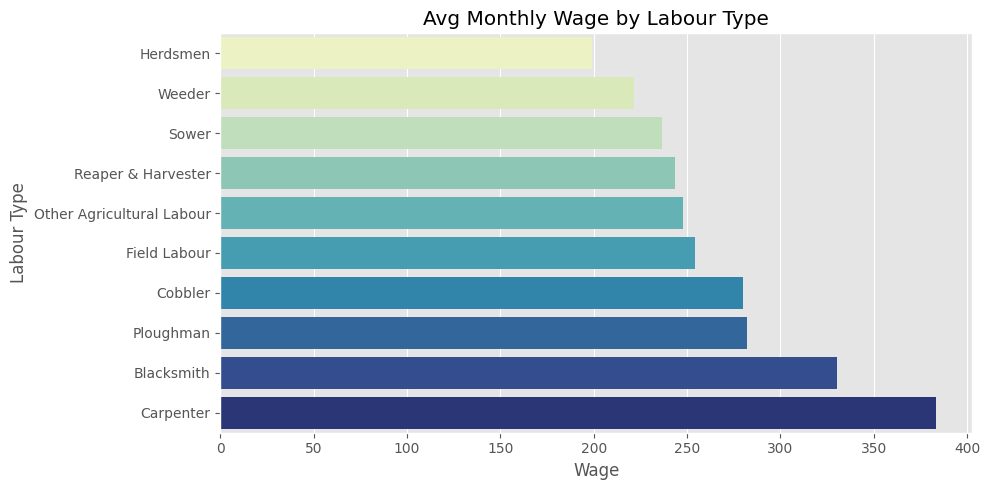

In [32]:
# Wages by Labour Type
labour_type_avg = df_filtered.groupby('labour_type')['monthly_average_wage'].mean().sort_values().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=labour_type_avg, y='labour_type', x='monthly_average_wage', palette='YlGnBu')

plt.title('Avg Monthly Wage by Labour Type')
plt.xlabel('Wage')
plt.ylabel('Labour Type')
plt.tight_layout()
plt.show()

**Step 6: Exporting the Cleaned and Enriched Dataset**


In [33]:
# Saving the cleaned and filtered dataset to a CSV file
df_filtered.to_csv('cleaned_agri_wages.csv', index=False)
